#**Healthcare Prediction**
###Name:- **Sawan Kumar**
---

## Importing Necessary Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_dataset.csv')

## **Exploratory Data Analysis (EDA)**

## Displaying the first few rows of the dataset

In [8]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Checking the shape of the dataset

In [9]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (768, 9)


## Displaying dataset information

In [10]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Displaying descriptive statistics

In [11]:
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Identifying the mean of selected features

In [12]:
print("\nMean Values of Key Features:")
print("Glucose:", data['Glucose'].mean())
print("BloodPressure:", data['BloodPressure'].mean())
print("SkinThickness:", data['SkinThickness'].mean())
print("Insulin:", data['Insulin'].mean())


Mean Values of Key Features:
Glucose: 120.89453125
BloodPressure: 69.10546875
SkinThickness: 20.536458333333332
Insulin: 79.79947916666667


## Counting the number of zero values in key columns

In [13]:
print("\nNumber of Zero Values in Key Features:")
print("Glucose:", len(data['Glucose'][data['Glucose'] == 0]))
print("BloodPressure:", len(data['BloodPressure'][data['BloodPressure'] == 0]))
print("SkinThickness:", len(data['SkinThickness'][data['SkinThickness'] == 0]))
print("Insulin:", len(data['Insulin'][data['Insulin'] == 0]))


Number of Zero Values in Key Features:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374


## Finding the null value percentage

In [14]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

## Displaying the null value percentage for each selected column

In [15]:
print("\nPercentage of Null Values for Each Column:")
print(null_percentage)


Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


## **Handling Missing Values**

## Replacing zero values with the mean of respective columns

In [16]:
data['Glucose'] = data['Glucose'].replace([0], [data['Glucose'].mean()])
data['BloodPressure'] = data['BloodPressure'].replace([0], [data['BloodPressure'].mean()])
data['SkinThickness'] = data['SkinThickness'].replace([0], [data['SkinThickness'].mean()])
data['Insulin'] = data['Insulin'].replace([0], [data['Insulin'].mean()])

## Checking the null value percentage of the treated columns

In [17]:
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

## Displaying the null value percentage after treatment

In [18]:
print("\nPercentage of Null Values After Treatment:")
print(null_percentage_treated)


Percentage of Null Values After Treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


## **Visualizing the Data**

## Displaying boxplots for numeric columns to visualize outliers


Visualizing Numeric Columns with Boxplots:


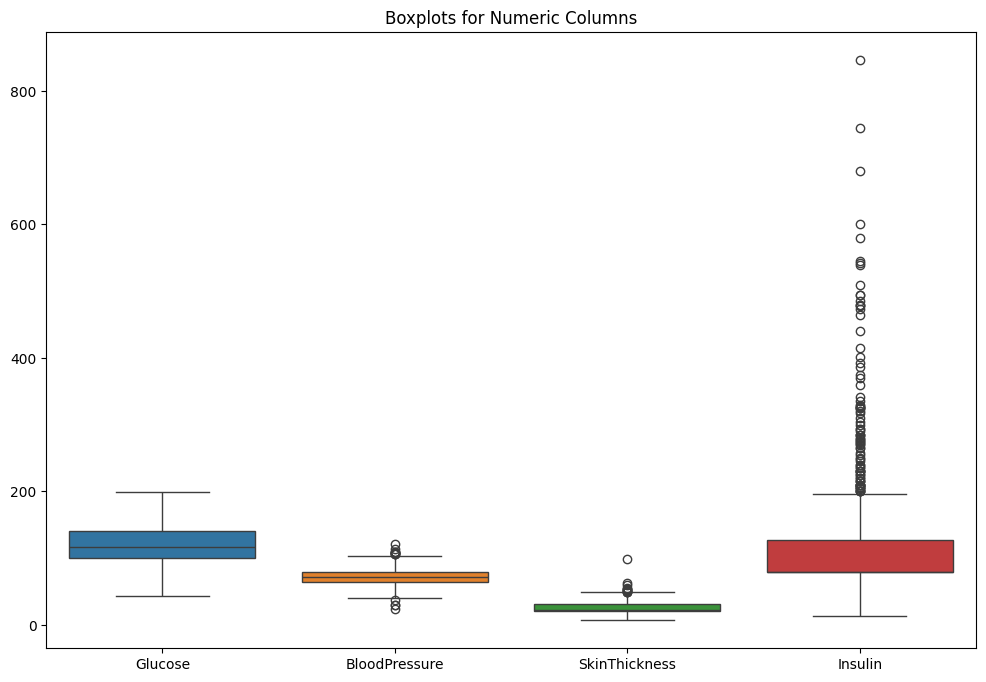

In [19]:
print("\nVisualizing Numeric Columns with Boxplots:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[selected_columns])
plt.title("Boxplots for Numeric Columns")
plt.show()

## **Identifying Outliers Using the IQR Method**

## Function to find outliers using IQR

In [20]:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

## Calculate and print the number of outliers for each column of interest

In [21]:
print("\nNumber of Outliers in Selected Columns:")
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")


Number of Outliers in Selected Columns:
Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


## Removing Outliers Using IQR Method

## Calculate the IQR for the dataset

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("\nInterquartile Range (IQR) for the Dataset:")
print(IQR)


Interquartile Range (IQR) for the Dataset:
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.300000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


## Removing outliers

In [23]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

## Displaying the shape of the dataset after removing outliers

In [24]:
print("\nShape of the Dataset After Removing Outliers:")
print("Before:", data.shape)
print("After:", data_cleared_iqr.shape)


Shape of the Dataset After Removing Outliers:
Before: (768, 9)
After: (610, 9)


## Checking for outliers in treated data using boxplot


Visualizing Numeric Columns After Outlier Treatment:


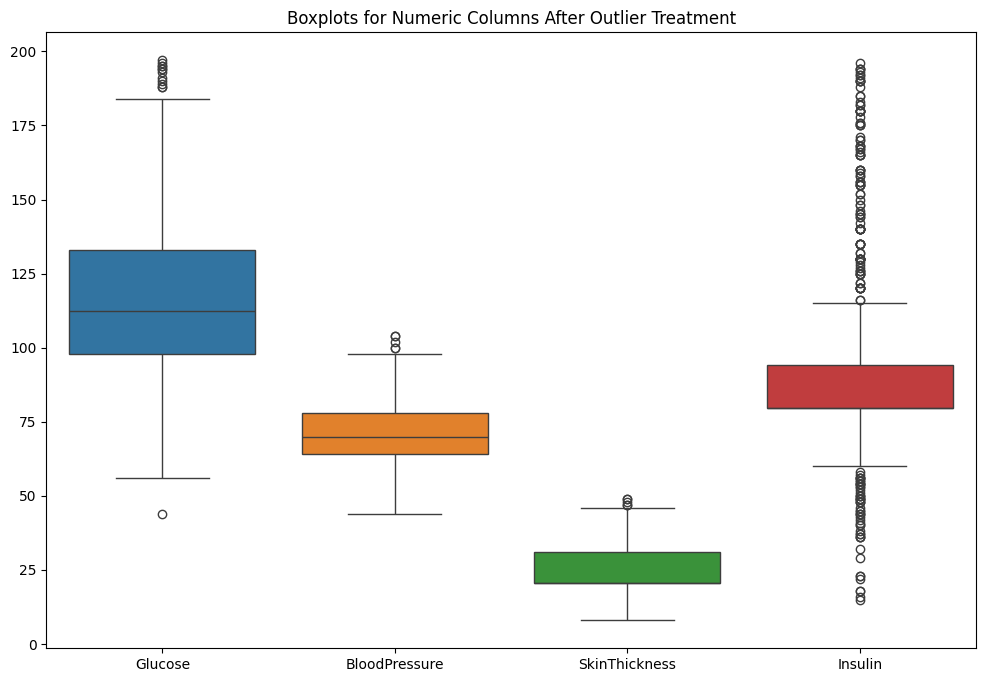

In [25]:
print("\nVisualizing Numeric Columns After Outlier Treatment:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleared_iqr[selected_columns])
plt.title("Boxplots for Numeric Columns After Outlier Treatment")
plt.show()

---
# **Thank You !!**
